In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('/kidney_disease.csv')
df.head(n=10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:

df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# Impuing Null values

from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:

df_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
# Finding Unique values in the columns

for i in df_imputed.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

************************************************* id ************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,

In [ ]:
print(df_imputed["rc"].mode())
print(df_imputed["wc"].mode())
print(df_imputed["pcv"].mode())

0    5.2
dtype: object
0    9800
dtype: object
0    41
dtype: object


In [ ]:
df_imputed["classification"]

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [ ]:
df_imputed["classification"]=df_imputed["classification"].apply(lambda x:'ckd' if x=="ckd\t"  else x)

df_imputed["cad"]=df_imputed["cad"].apply(lambda x:'no' if x=="\tno"  else x)

df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'no' if x=="\tno"  else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x=="\tyes"  else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x==' yes'  else x)

df_imputed["rc"]=df_imputed["rc"].apply(lambda x:'5.2' if x=='\t?'  else x)

df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t6200'  else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t8400'  else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x== '\t?'  else x)

df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x=='\t43'  else x)
df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x== '\t?'  else x)

In [ ]:
# Finding Unique values in the columns

for i in df_imputed.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

************************************************* id ************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,

AxesSubplot(0.125,0.125;0.775x0.755)


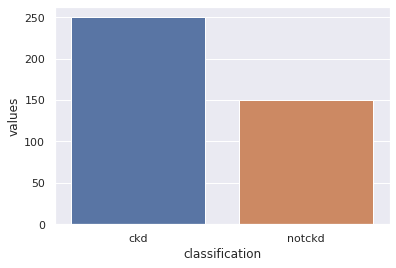

In [ ]:
#Check Label Imbalance

import matplotlib.pyplot as plt
import seaborn as sns

temp=df_imputed["classification"].value_counts()
temp_df= pd.DataFrame({'classification': temp.index,'values': temp.values})
print(sns.barplot(x = 'classification', y="values", data=temp_df))

In [ ]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
# fixing data types

df_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [ ]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

In [ ]:
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

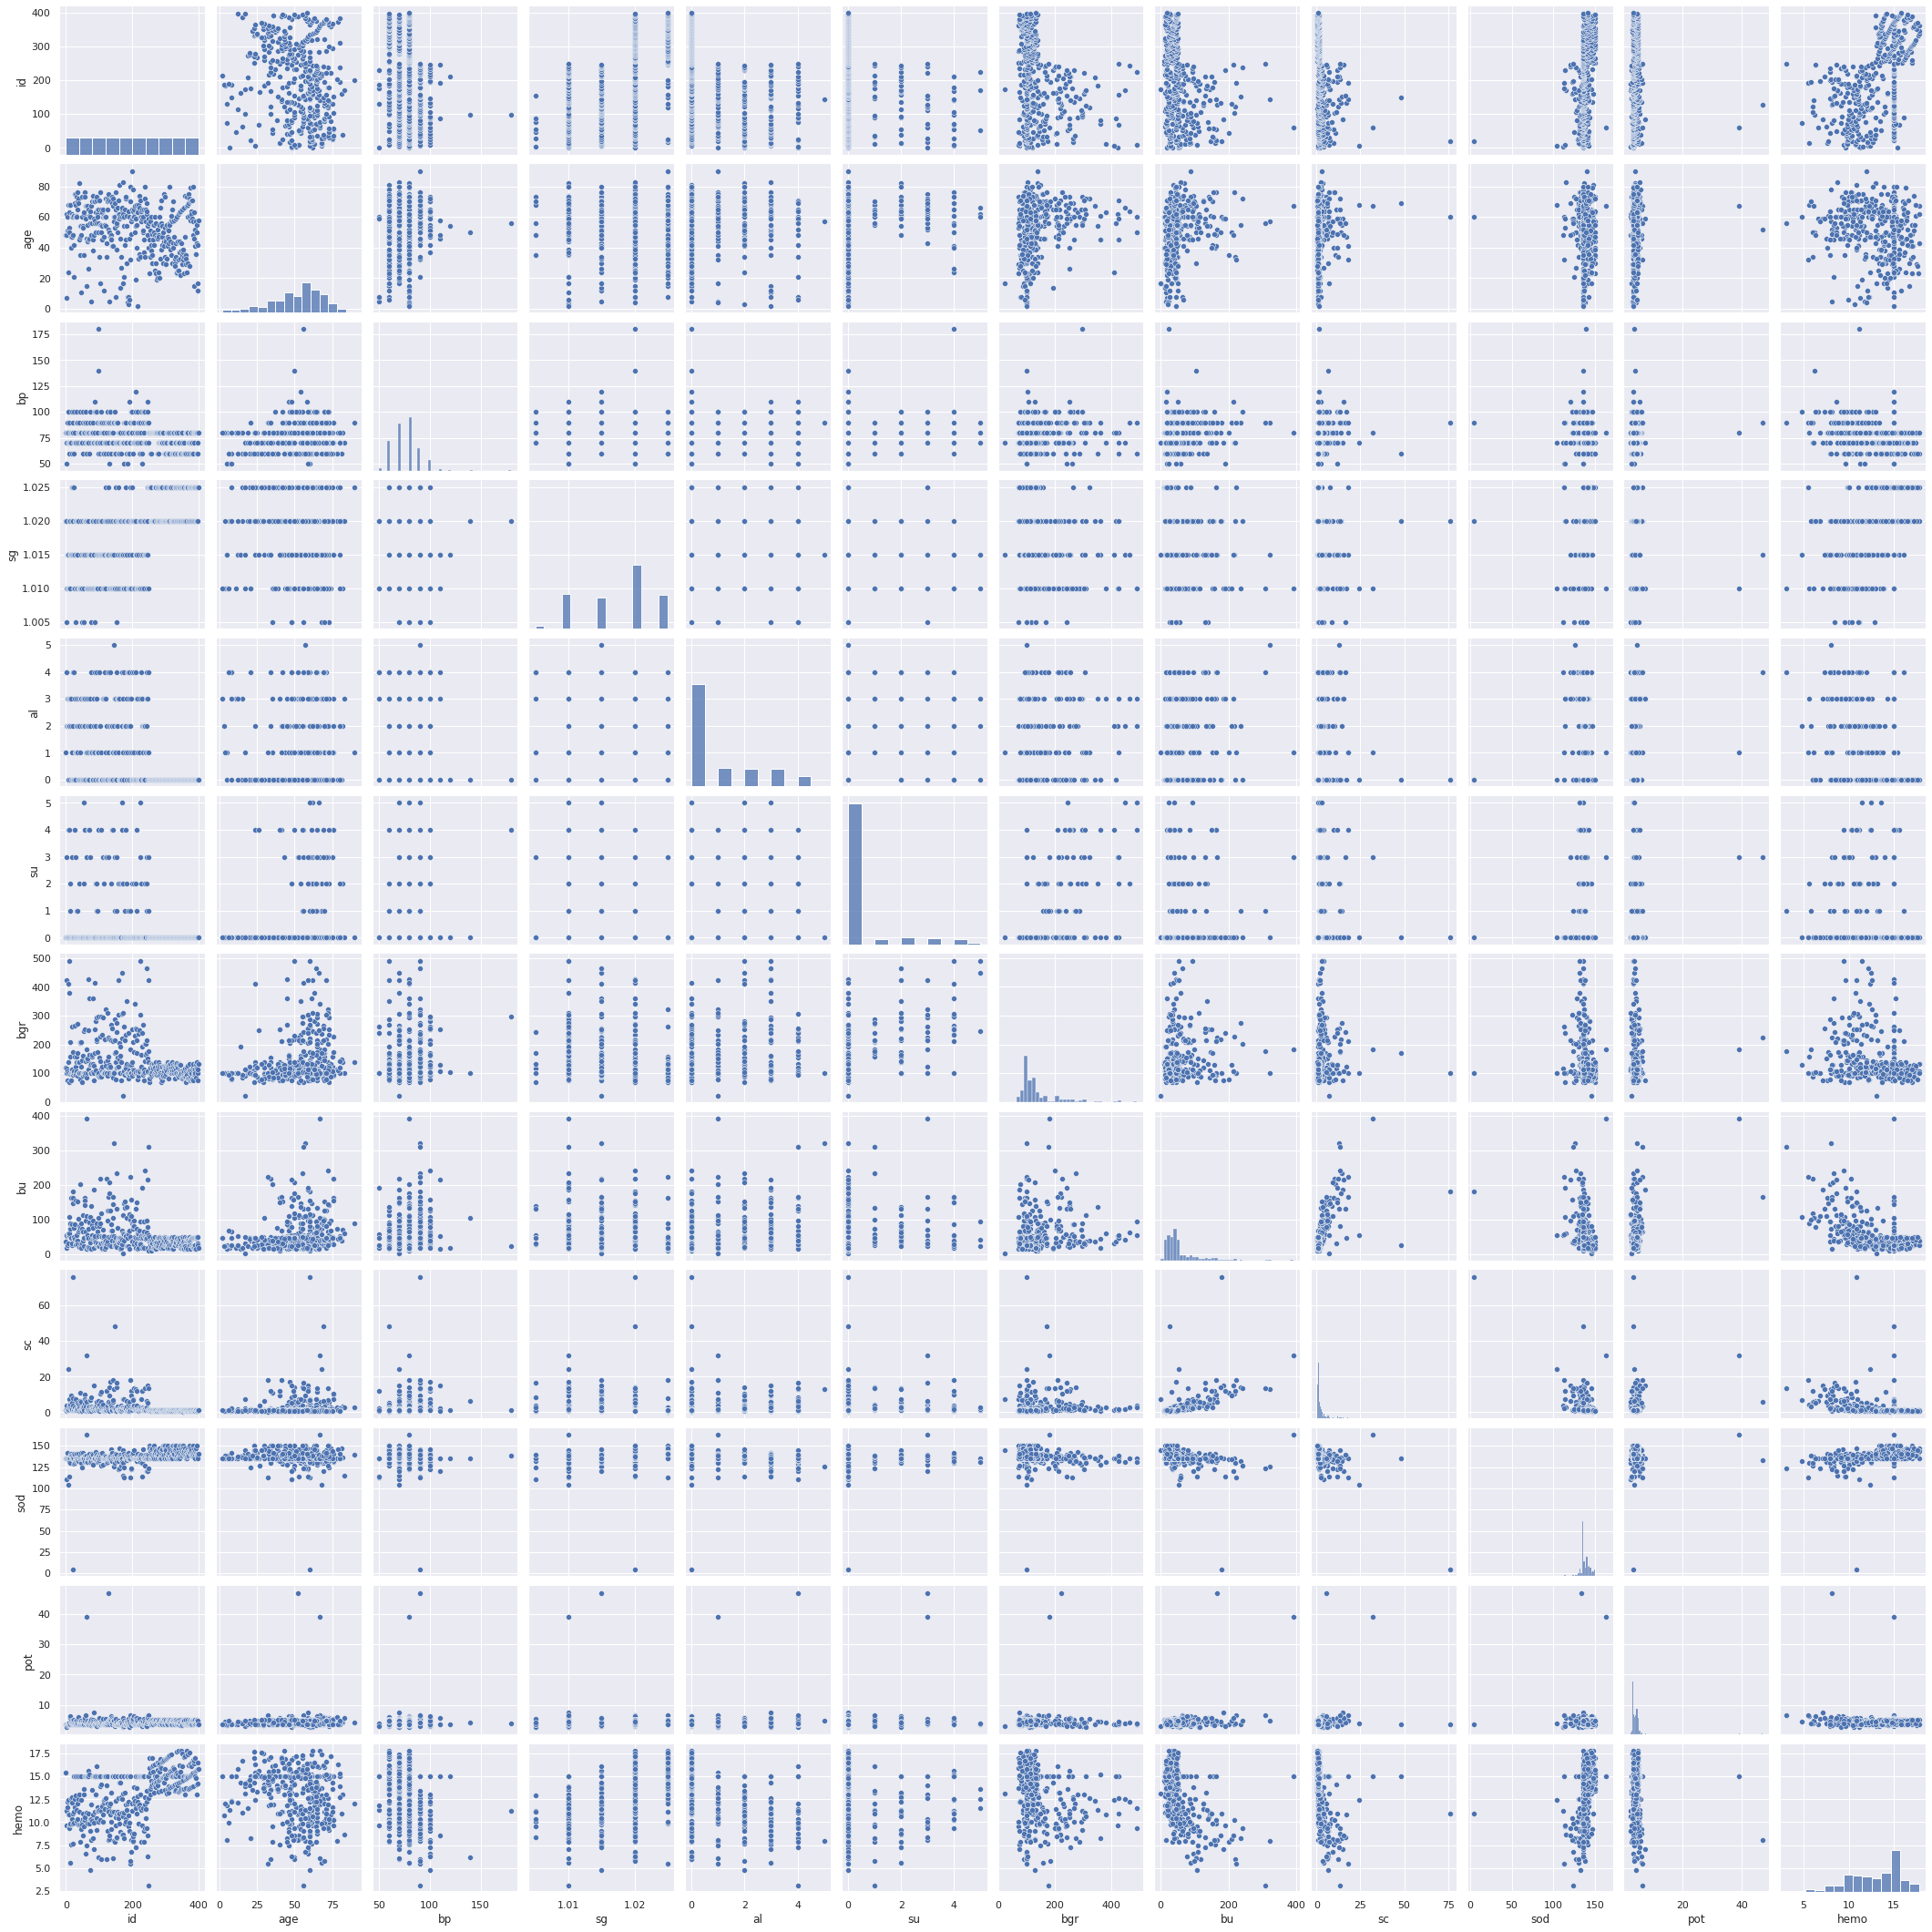

In [ ]:
sns.pairplot(df_imputed)

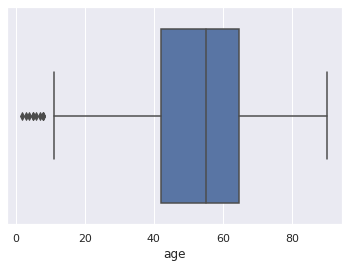

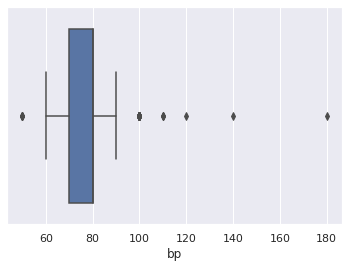

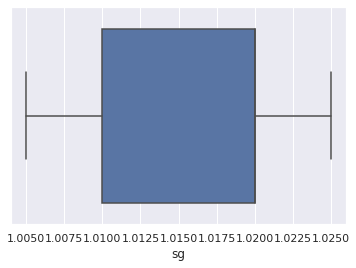

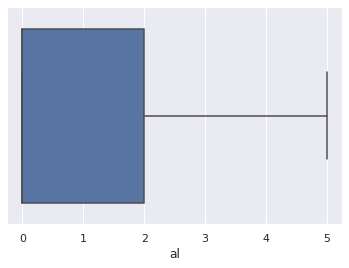

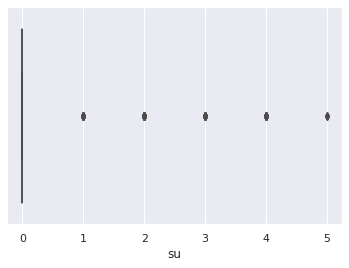

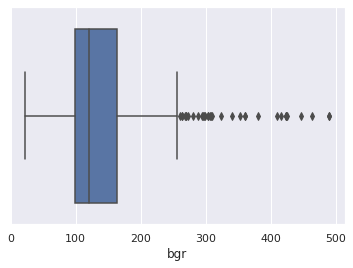

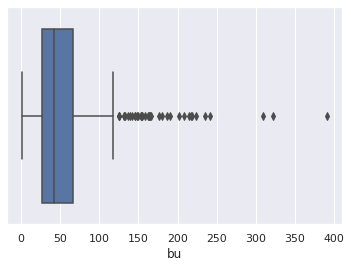

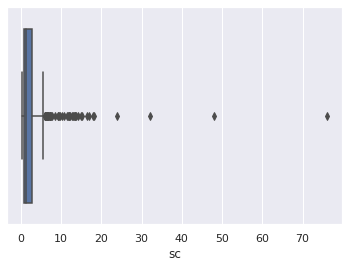

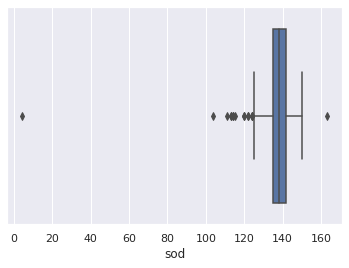

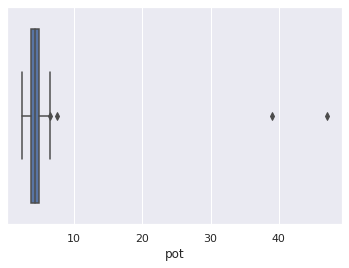

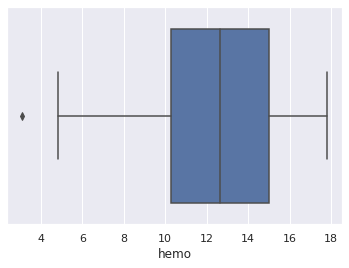

In [ ]:
# Find and remove outliers of data

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

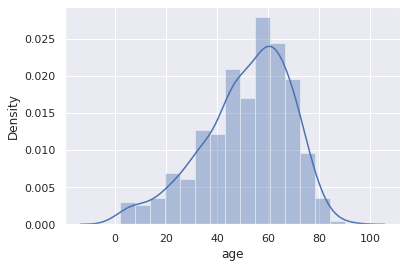

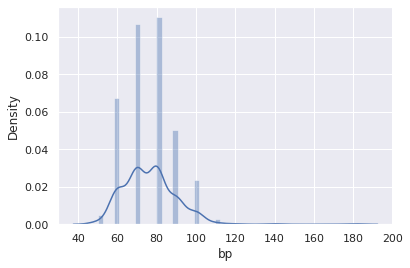

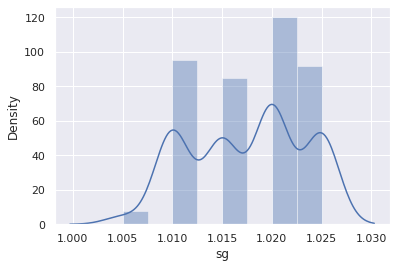

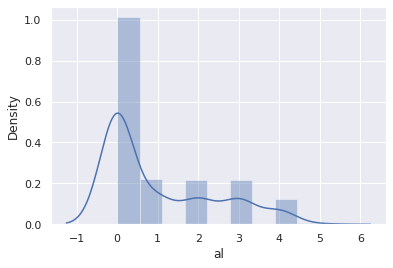

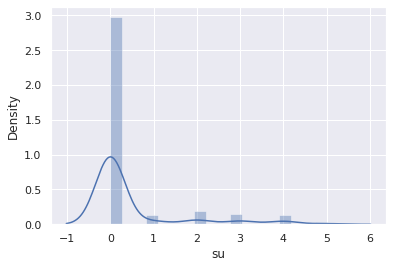

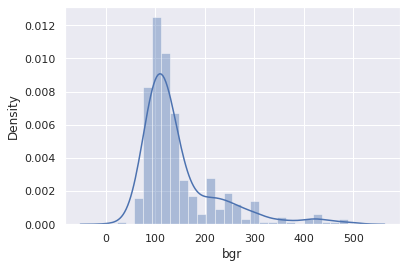

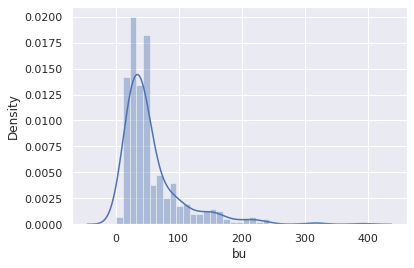

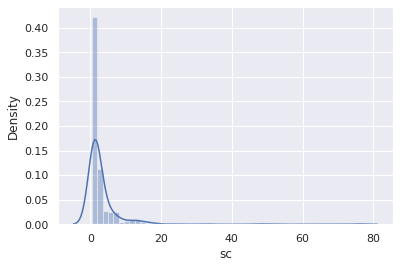

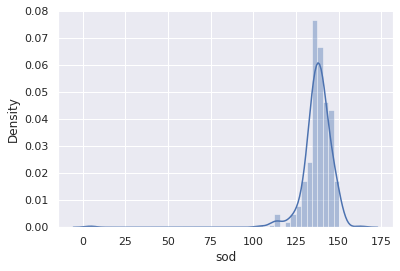

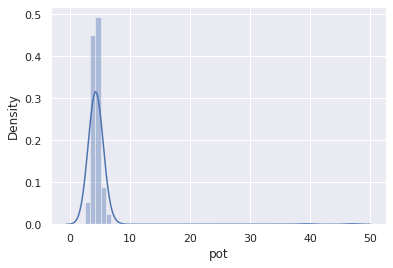

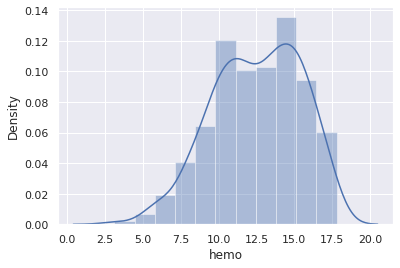

In [ ]:
# Find the distribution of data

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

In [ ]:
# Label encoding to convert categorical values to numerical
from sklearn import preprocessing

df_enco=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,1,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,0,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,1,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,0,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,29,0,0,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,43,0,0,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,35,0,0,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,40,0,0,0,0,0,0,1


In [ ]:
df_enco.to_csv("Kidney_Disease_Pre-Processed.csv")

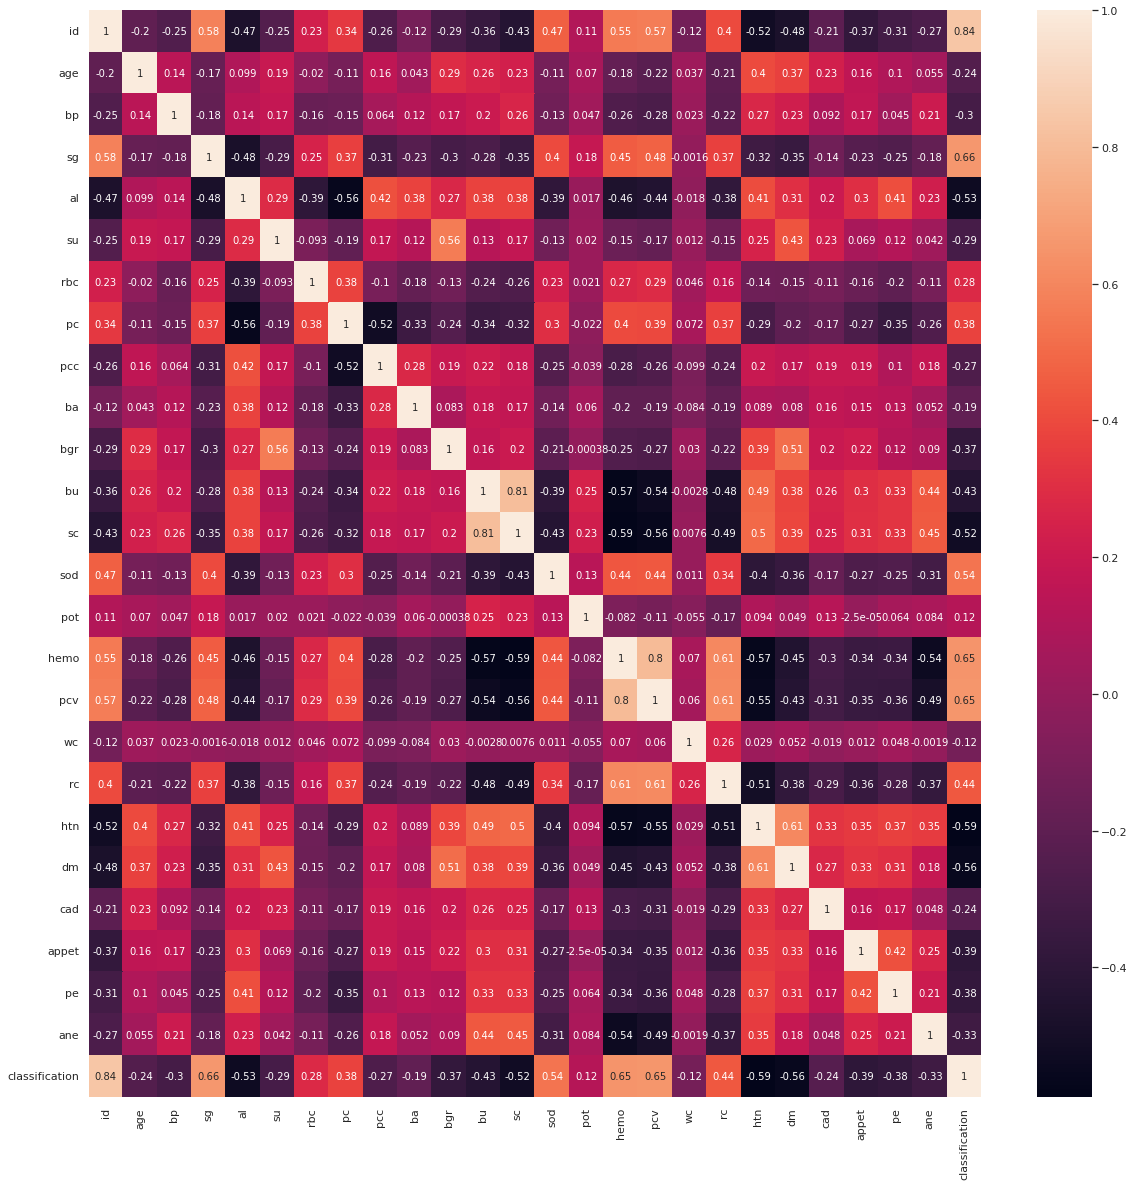

In [ ]:
# Finding Correlations

plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)

In [ ]:
# Lets make some final changes to the data 

# Seperate independent and dependent variables and drop the ID column
x=df_enco.drop(["id","classification"],axis=1)
y=df_enco["classification"]

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({0: 250, 1: 150})


In [ ]:
# Lets balance the labels

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [ ]:

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

In [ ]:
x

array([[ 0.06666667, -0.33333333,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.86666667, -1.        ,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.44      , -0.33333333, -0.5       , ...,  1.        ,
        -1.        ,  1.        ],
       ...,
       [ 0.14666667, -0.77777778,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [-0.54666667, -0.33333333,  0.5       , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.01333333, -0.77777778,  1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

(500, 24)
(500, 18)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.30, 
                                                    random_state=101)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import random

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [ ]:
X_test

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
18,52,5,4,0,3,1,1,0,0,117,...,63,23,10,23,1,1,1,0,0,0
361,22,3,3,0,0,1,1,0,0,1,...,73,40,47,39,0,0,0,0,0,0
104,47,4,3,0,0,1,1,0,0,66,...,86,27,87,33,1,1,0,1,1,0
4,43,3,1,2,0,1,1,0,0,33,...,52,21,65,26,0,0,0,0,0,0
156,58,4,2,2,0,1,1,0,1,71,...,86,27,87,33,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,52,1,1,3,1,1,0,1,0,124,...,16,11,26,9,1,0,0,1,0,1
346,25,1,3,0,0,1,1,0,0,56,...,91,38,39,39,0,0,0,0,0,0
423,21,2,3,0,0,1,1,0,0,57,...,86,31,77,46,0,0,0,0,0,0
17,39,3,3,0,0,1,1,0,0,41,...,57,27,87,33,1,0,0,1,0,0


In [ ]:
X_test.iloc[149:150]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
259,27,3,3,0,0,1,1,0,0,31,...,97,31,39,33,0,0,0,0,0,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='linear') 
sv.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
j=1
for i in range(len(X_test)):
    print(X_test.iloc[i:j])
    j+=1
    

    age  bp  sg  al  su  rbc  pc  pcc  ba  bgr  ...  hemo  pcv  wc  rc  htn  \
18   52   5   4   0   3    1   1    0   0  117  ...    63   23  10  23    1   

    dm  cad  appet  pe  ane  
18   1    1      0   0    0  

[1 rows x 24 columns]
     age  bp  sg  al  su  rbc  pc  pcc  ba  bgr  ...  hemo  pcv  wc  rc  htn  \
361   22   3   3   0   0    1   1    0   0    1  ...    73   40  47  39    0   

     dm  cad  appet  pe  ane  
361   0    0      0   0    0  

[1 rows x 24 columns]
     age  bp  sg  al  su  rbc  pc  pcc  ba  bgr  ...  hemo  pcv  wc  rc  htn  \
104   47   4   3   0   0    1   1    0   0   66  ...    86   27  87  33    1   

     dm  cad  appet  pe  ane  
104   1    0      1   1    0  

[1 rows x 24 columns]
   age  bp  sg  al  su  rbc  pc  pcc  ba  bgr  ...  hemo  pcv  wc  rc  htn  \
4   43   3   1   2   0    1   1    0   0   33  ...    52   21  65  26    0   

   dm  cad  appet  pe  ane  
4   0    0      0   0    0  

[1 rows x 24 columns]
     age  bp  sg  al  su  rb

In [ ]:
j=1
li=[]
li2=[]
count=0
for i in range(len(X_test)):
    p1 = logmodel.predict(X_test.iloc[i:j])
    p2 =clf.predict(X_test.iloc[i:j])
    p3= sv.predict(X_test.iloc[i:j])
    p4=rf.predict(X_test.iloc[i:j])
    li.append(p1[0])
    li.append(p2[0])
    li.append(p3[0])
    li.append(p4[0])
    j+=1
    print(li,end='')
    if(li.count(1)>li.count(0)):
        pred=1
    else:
        pred=0
    li2.append(pred)
    print(' MAX VOTE -->',li2[i] )
    if(y_test.to_numpy()[i]==pred):
        count+=1
    else:
        pass    
    li=[]
print("accuracy is {}".format(count/150))
        

[0, 0, 0, 0] MAX VOTE --> 0
[1, 1, 1, 1] MAX VOTE --> 1
[0, 0, 0, 0] MAX VOTE --> 0
[0, 0, 0, 0] MAX VOTE --> 0
[0, 0, 0, 0] MAX VOTE --> 0
[1, 1, 1, 1] MAX VOTE --> 1
[0, 0, 0, 0] MAX VOTE --> 0
[0, 0, 0, 0] MAX VOTE --> 0
[0, 0, 0, 0] MAX VOTE --> 0
[1, 1, 1, 1] MAX VOTE --> 1
[1, 1, 1, 1] MAX VOTE --> 1
[1, 1, 1, 1] MAX VOTE --> 1
[0, 0, 0, 0] MAX VOTE --> 0
[1, 1, 1, 1] MAX VOTE --> 1
[0, 0, 0, 0] MAX VOTE --> 0
[0, 0, 0, 0] MAX VOTE --> 0
[1, 1, 1, 1] MAX VOTE --> 1
[0, 0, 0, 0] MAX VOTE --> 0
[1, 1, 1, 1] MAX VOTE --> 1
[1, 1, 1, 1] MAX VOTE --> 1
[0, 0, 0, 0] MAX VOTE --> 0
[0, 0, 0, 0] MAX VOTE --> 0
[1, 1, 1, 1] MAX VOTE --> 1
[0, 0, 0, 0] MAX VOTE --> 0
[0, 0, 0, 0] MAX VOTE --> 0
[1, 1, 1, 1] MAX VOTE --> 1
[1, 1, 1, 1] MAX VOTE --> 1
[1, 1, 1, 1] MAX VOTE --> 1
[0, 0, 0, 0] MAX VOTE --> 0
[1, 1, 1, 1] MAX VOTE --> 1
[0, 0, 0, 0] MAX VOTE --> 0
[1, 1, 1, 1] MAX VOTE --> 1
[0, 0, 0, 0] MAX VOTE --> 0
[0, 0, 0, 0] MAX VOTE --> 0
[0, 0, 0, 0] MAX VOTE --> 0
[1, 1, 1, 1] MAX VOT

In [ ]:
#y labels for testing
y_test

18     0
361    1
104    0
4      0
156    0
      ..
147    0
346    1
423    1
17     0
259    1
Name: classification, Length: 150, dtype: int64

In [1]:
#list of all predictions from ensemble technoque
x_tes

NameError: ignored

In [ ]:
ensemble_pred=np.array(li2)

In [ ]:
#These are predictions from ensemble technique in numpy array
ensemble_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
y_test.to_numpy()

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
#evaluating the y_test values with the ensemble predictions
y_test.to_numpy()==ensemble_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
print(confusion_matrix(y_test,predictions))

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))